In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./public/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


DATA CLEANING AND PROCESSING

In [7]:
df.shape

(541909, 8)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,541909.0,15287.518434,1484.746041,12346.00,14367.00,15287.00,16255.00,18287.0


In [13]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
df.isna().sum()

df.dropna(inplace=True)

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
"""there are special characters inclue in desciption.we have to remove that rows.
first we checked is there any special character included"""

print(df.drop(df[df.Description.str.contains(r'[@#?$%*]')].index))

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0     

In [23]:
df = df.drop(df.index[df.Quantity < 0])

In [24]:
df = df.drop(df.index[df['UnitPrice'] < 0])

In [25]:
df.select_dtypes(include='number').apply(lambda x : (x<0).sum())

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [29]:
df.shape[0:2]

(530691, 8)

Data exploration and visualization

In [31]:
df["Final_Price"] = df["Quantity"]*df["UnitPrice"]
df.Final_Price

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Final_Price, Length: 530691, dtype: float64

Q.1 Total quantity of products bought in different countries

In [37]:
Quantity_acc_countries = df.groupby('Country')["Quantity"].sum()
Quantity_acc_countries = Quantity_acc_countries.sort_values(ascending=False)

Quantity_acc_countries

Country
United Kingdom          4701270
Netherlands              200937
EIRE                     147447
Germany                  119263
France                   112104
Australia                 84209
Sweden                    36083
Switzerland               30630
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16258
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Hong Kong                  4773
Israel                     4409
Poland                     3684
Unspecified                3300
Canada                     2763
Iceland                    2458
USA                        2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


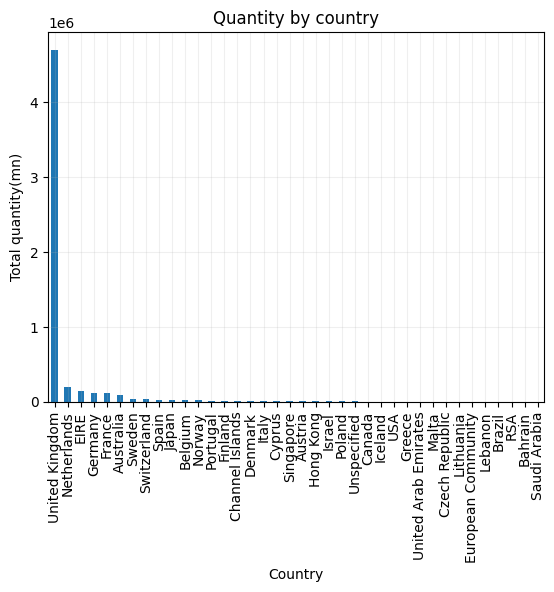

In [40]:
Quantity_acc_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total quantity(mn)')
plt.title('Quantity by country')
plt.grid(True,alpha=0.2)
plt.show()

In [43]:
final_price_acc_countries = df.groupby('Country')["Final_Price"].sum()
final_price_acc_countries = final_price_acc_countries.sort_values(ascending=False)

final_price_acc_countries

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

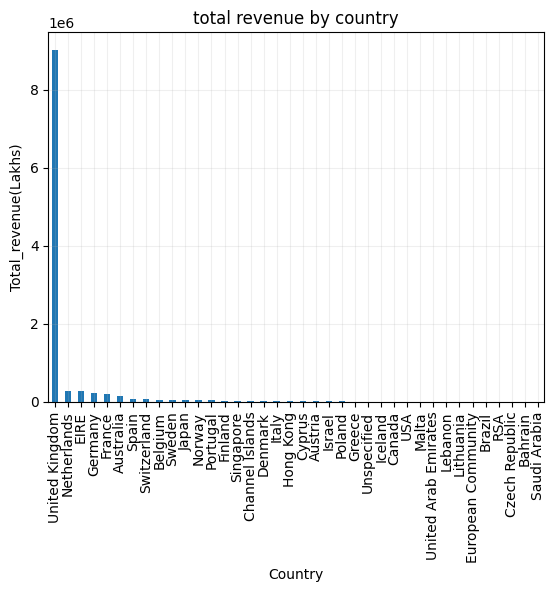

In [44]:
final_price_acc_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total_revenue(Lakhs)')
plt.title('total revenue by country')
plt.grid(True,alpha=0.2)
plt.show()

In [45]:
df[['Quantity', 'Final_Price', 'UnitPrice']].describe().round().T

,count,mean,std,min,25%,50%,75%,max
Quantity,530691.0,11.0,157.0,1.0,1.0,3.0,10.0,80995.0
Final_Price,530691.0,20.0,270.0,0.0,4.0,10.0,18.0,168470.0
UnitPrice,530691.0,4.0,36.0,0.0,1.0,2.0,4.0,13541.0


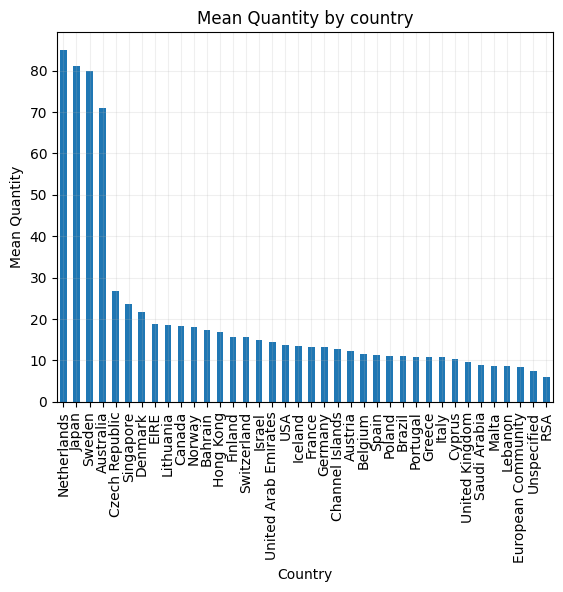

In [46]:
Mean_Quantity_by_country=df.groupby('Country')['Quantity'].mean().sort_values(ascending= False)

Mean_Quantity_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Mean Quantity')
plt.title('Mean Quantity by country')
plt.grid(True,alpha=0.2)
plt.show()

In [50]:
df.InvoiceDate = pd.to_datetime(df["InvoiceDate"])

df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 530691, dtype: datetime64[ns]

In [52]:
df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year

df.Year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: Year, Length: 530691, dtype: int32

In [54]:
total_quantity_per_year = df.groupby('Year')["Quantity"].sum()
total_quantity_per_year

Year
2010     360431
2011    5268001
Name: Quantity, dtype: int64

In [56]:
pct_change_in_yr = total_quantity_per_year.pct_change()*100

pct_change_in_yr

Year
2010            NaN
2011    1361.583771
Name: Quantity, dtype: float64

In [58]:
df["Month"] = pd.to_datetime(df["InvoiceDate"]).dt.month

df["Month"]

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: Month, Length: 530691, dtype: int32

In [59]:
df1 = df.pivot_table(["Final_Price", "Quantity"], index="Month", aggfunc="sum", sort=True)

df1

,Final_Price,Quantity
Month,,
1,691364.560,388052
2,523631.890,283662
3,717639.360,381085
4,537808.621,310280
5,770536.020,397838
6,761739.900,393526
7,719221.191,406005
8,759138.380,423078
9,1058590.172,572646


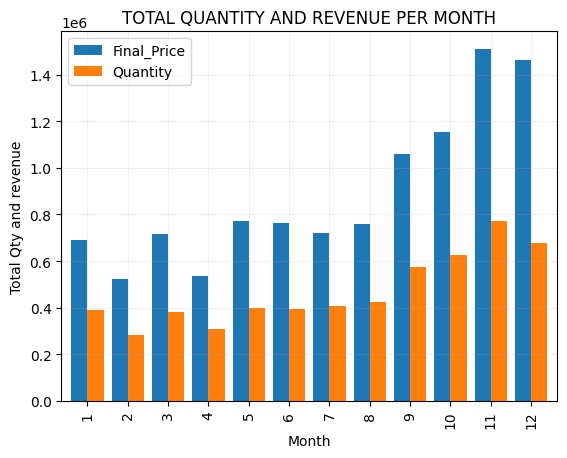

In [65]:
df1.plot(kind='bar',width=0.8)
plt.xlabel('Month')
plt.ylabel('Total Qty and revenue')
plt.title('TOTAL QUANTITY AND REVENUE PER MONTH')
plt.grid(True,alpha=0.2)
plt.show()